# Etude de marché pour La poule qui chante (Clustering)

# Sommaire


* [1. Importation des librairies et du Dataframe df](#1)
    * [1.1 Importation des librairies](#1_1)
    * [1.2 Importation du Dataframe](#1_2)
* [2. Preprocessing des données](#2)
    * [2.1 Séparation des données](#2_1)
    * [2.2 Centrer et réduire les données](#2_2)
* [3. Classification ascendante hiérarchique (CAH)](#3)
    * [3.1 Le dendrogramme](#3_1)
    * [3.2 Etude des 4 clusters](#3_2)
        * [3.2.1 Visualisation des  4 clusters sous la forme d'une clustermap](#3_2_1)
        * [3.2.2 Visualisation des 4 clusters en radar](#3_2_2)
* [4. Classification avec la méthode du K-Means](#4)
    * [4.1 Méthode du coude](#4_1)
    * [4.2 Calcul des 4 clusters](#4_2)
    * [4.3 Visualisation dans le repère des composantes principales 1 et 2](#4_3)
    * [4.4 Visualisation dans le repère des composantes principales 1, 2 et 3](#4_4)
    * [4.5 Clustermap des 4 clusters](#4_5)
    * [4.6 Visualisation 'radar' des 4 clusters](#4_6)
* [5. Analyse des clusters retenus](#5)
    * [5.1 Similitude entre les deux clusters](#5_1)
    * [5.2 Choix du cluster](#5_2)

## 1. Importation des librairies et du Dataframe df <a class="anchor" id="1"></a>

### 1.1 Importation des librairies <a class="anchor" id="1_1"></a>

In [1]:
# Exploration des données et calculs
import pandas as pd
import numpy as np

# Scaler
from sklearn.preprocessing import StandardScaler

# Pour la CAH
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Pour le KMeans
from sklearn.cluster import KMeans

# Graphiques
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
# Pour le graphique en radar
from math import pi

# Visualisation 3D
import plotly.offline as py
import plotly.graph_objs as go

# Pour la visualisation dans le repères des composantes principales
from sklearn.decomposition import PCA

# Ignorer tous les avertissements
import warnings
warnings.filterwarnings("ignore")

### 1.2 Importation du Dataframe <a class="anchor" id="1_2"></a>

In [2]:
# Importation
df = pd.read_csv('df.csv', index_col=0)

## 2. Preprocessing des données <a class="anchor" id="2"></a>

### 2.1 Séparation des données <a class="anchor" id="2_1"></a>

In [3]:
# X la matrice des données
X = df.values

# Vérifions qu'il s'agit bien d'un np.array
type(X)

numpy.ndarray

In [4]:
# Nous enregistrerons nos individus sous la variable 'pays'
pays = df.index
pays

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Viet Nam', 'Yémen', 'Zambie', 'Zimbabwe', 'Égypte',
       'Émirats arabes unis', 'Équateur', 'États-Unis d'Amérique', 'Éthiopie',
       'Îles Salomon'],
      dtype='object', name='Zone', length=171)

In [5]:
# et nos étiquettes de données sous la variable 'features'
features = df.columns
features

Index(['Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Population', 'Stabilité politique', 'PIB',
       'Emission de CO2', 'TAS'],
      dtype='object')

### 2.2 Centrer et réduire les données <a class="anchor" id="2_2"></a>

In [6]:
# Il faut scaler les données dans un premier temps. On instancie : 
scaler = StandardScaler()

# On entraine le scaler sur nos données : 
scaler.fit(X)

StandardScaler()

In [7]:
# On transforme nos données
X_scaled = scaler.transform(X)
X_scaled[:3]

array([[-0.36961429, -0.25465411,  0.24201074,  0.7816276 , -3.85241817,
        -0.40961285, -0.26333567, -0.46105414],
       [ 1.56195821, -0.06853102,  1.76505469,  1.01465406, -0.05163096,
         0.97347509,  0.49422906,  0.11821013],
       [-0.47120088, -0.25465411,  0.38256529, -0.52538898,  0.57577268,
        -0.5811428 , -0.26876041, -0.95322132]])

## 3. Classification ascendante hiérarchique (CAH) <a class="anchor" id="3"></a>

### 3.1 Le dendrogramme <a class="anchor" id="3_1"></a>

In [8]:
# Calculons les distances en spécifiant la méthode à utiliser (nous utiliserons nos données centrées réduites)
Z = linkage(X_scaled, method='ward')
Z[:10]

array([[109.        , 111.        ,   0.22460959,   2.        ],
       [ 38.        , 114.        ,   0.25102844,   2.        ],
       [ 35.        ,  47.        ,   0.27771225,   2.        ],
       [107.        , 119.        ,   0.29911703,   2.        ],
       [ 27.        , 163.        ,   0.31026594,   2.        ],
       [  6.        , 133.        ,   0.31884394,   2.        ],
       [ 11.        , 145.        ,   0.33190203,   2.        ],
       [ 42.        ,  69.        ,   0.33874153,   2.        ],
       [142.        , 167.        ,   0.34675303,   2.        ],
       [ 55.        , 176.        ,   0.3819047 ,   3.        ]])

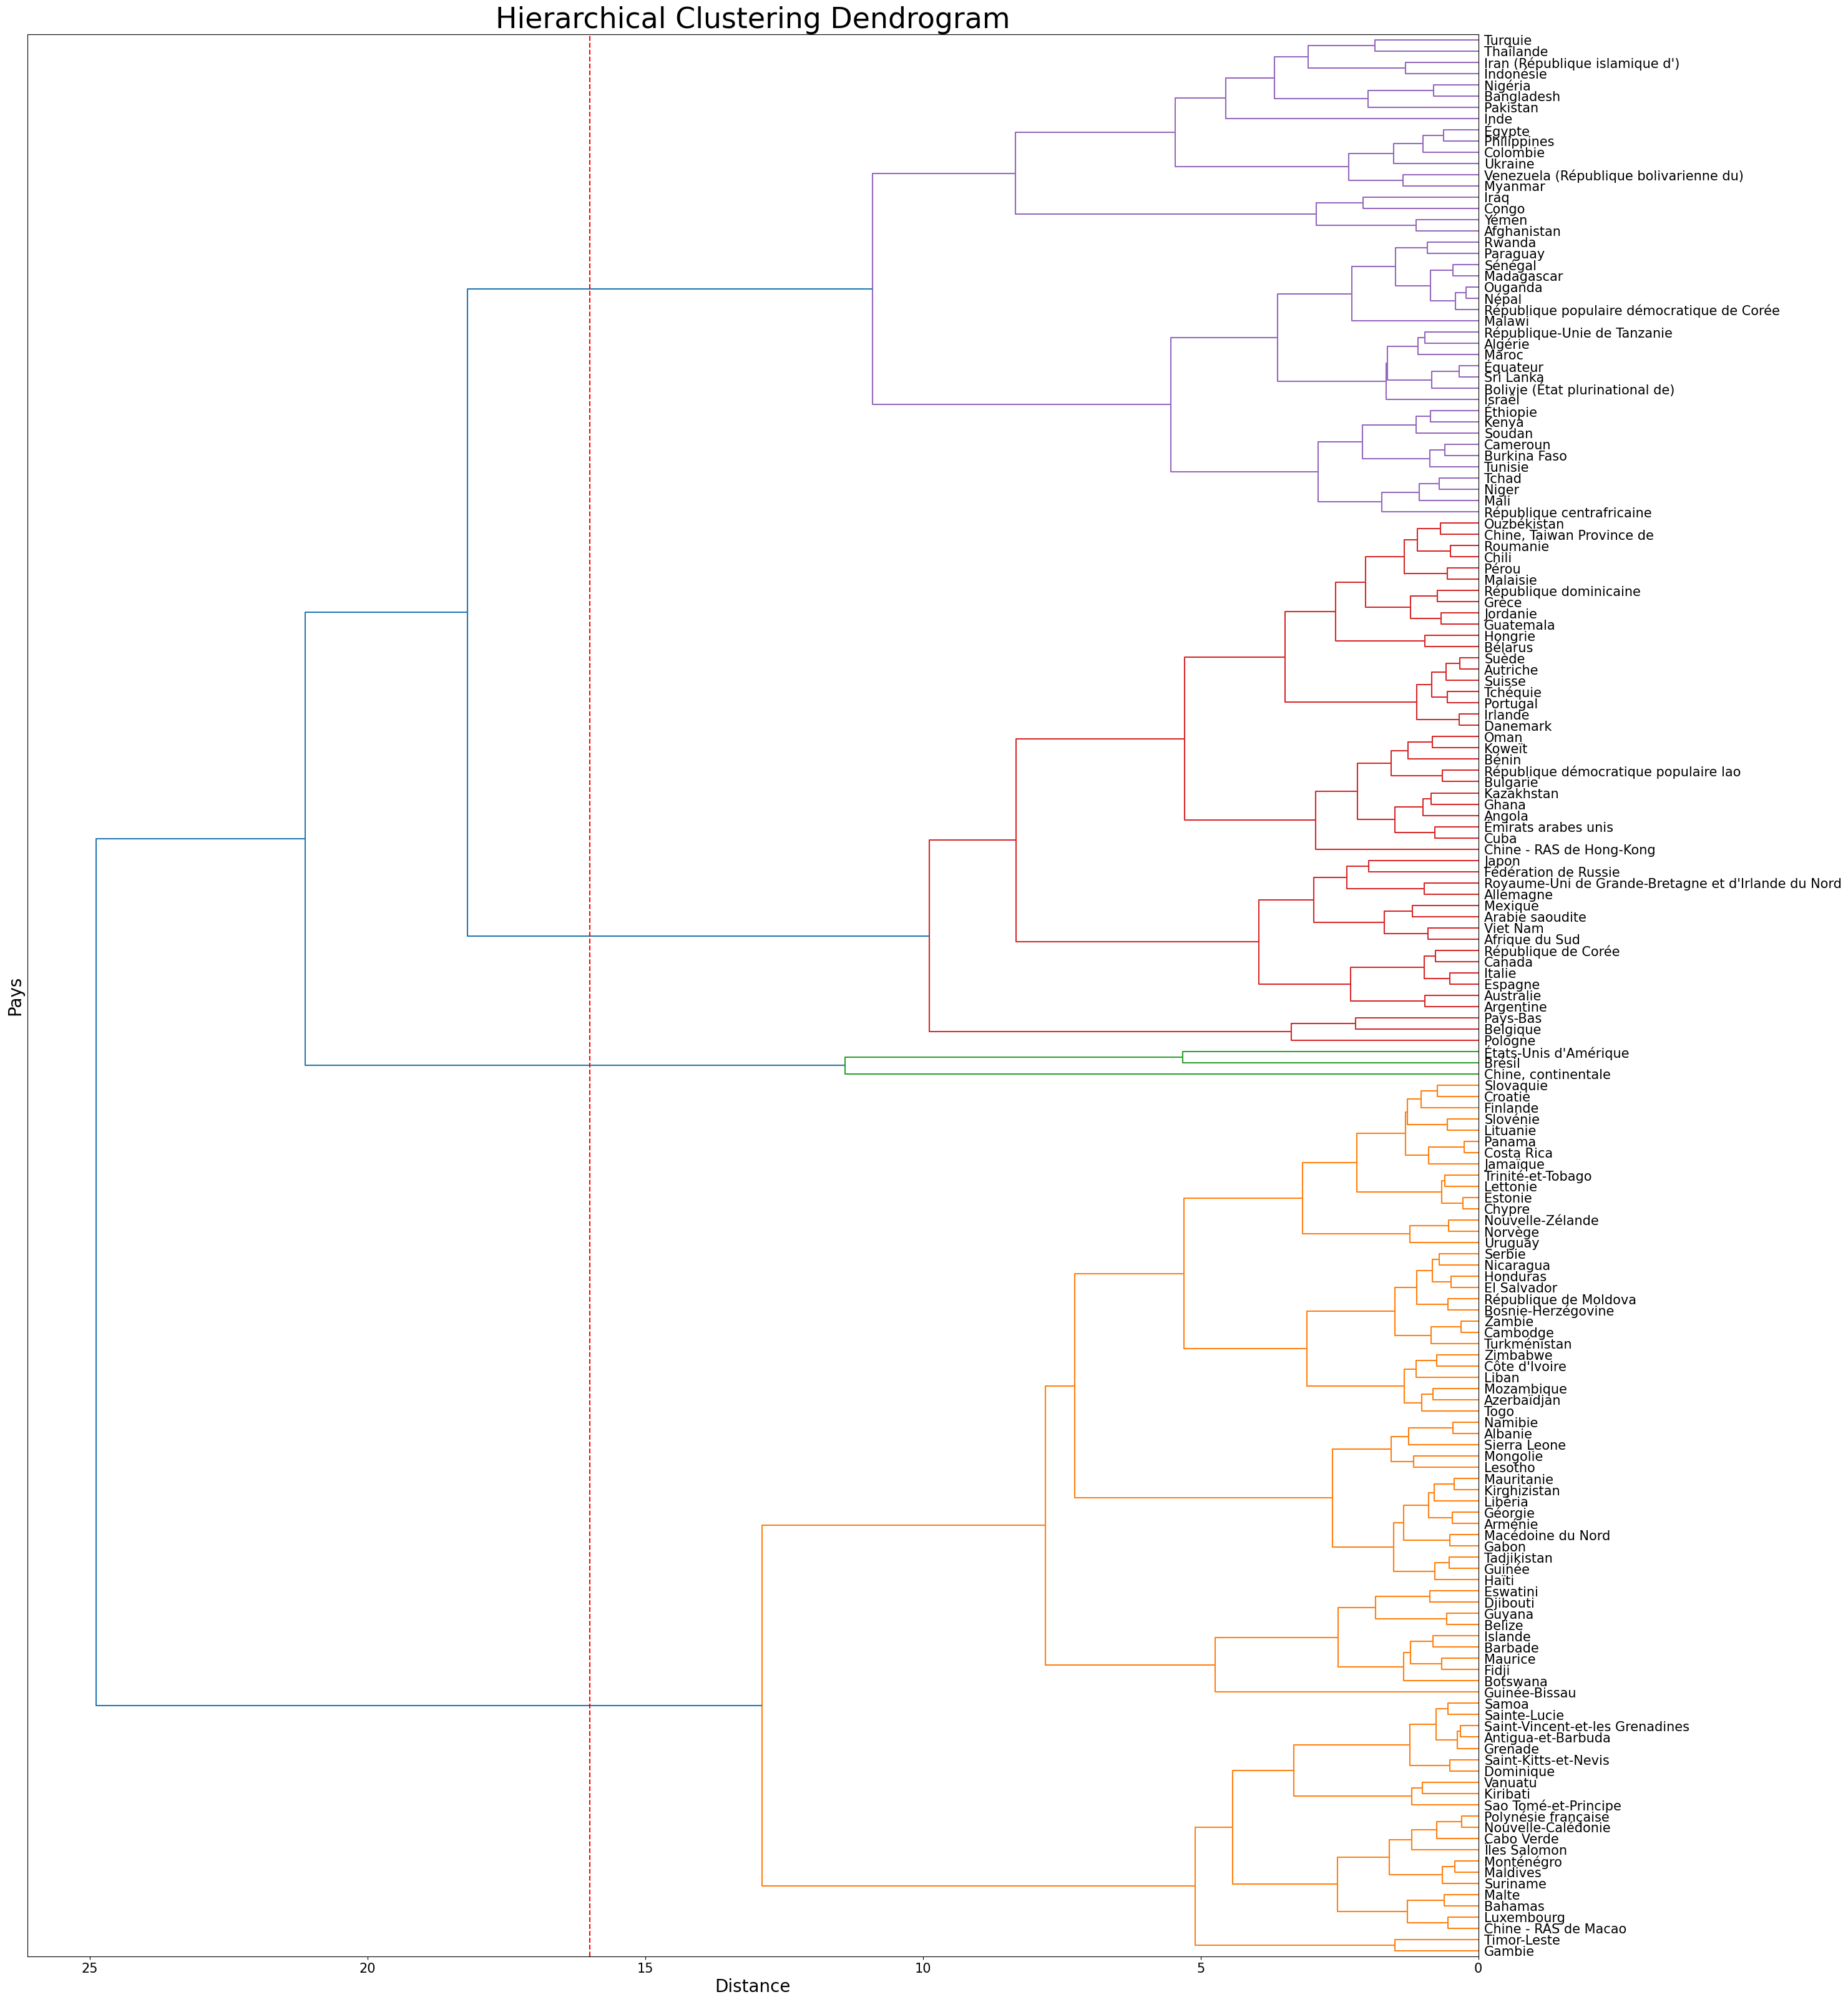

In [9]:
# On peut maintenant tracer le dendrogramme
fig, ax = plt.subplots(1, 1, figsize=(30,40))

_ = dendrogram(Z, ax=ax, labels=pays, orientation = "left")

plt.title("Hierarchical Clustering Dendrogram", fontsize = 33)
ax.set_xlabel("Distance", fontsize = 20)
ax.set_ylabel("Pays", fontsize = 20)
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)

# Choix du nombre de clusters
plt.axvline(x= 16, color = 'r', linestyle ='--')
plt.show()

Nous avons tracé la ligne pointillée rouge pour déterminer le nombre de clusters à étudier. Au vu du dendrogramme, il semble intéressant de choisir une distance de 16 afin d'obtenir 4 clusters.

L'objectif est d'obtenir des clusters suffisamment homogènes, où chaque pays d'un même cluster est suffisamment proche et où chaque cluster est suffisamment éloigné.

### 3.2 Etude des 4 clusters <a class="anchor" id="3_2"></a>

In [10]:
# Déterminons le contenu des clusters
clusters = AgglomerativeClustering(n_clusters=4)

In [11]:
# Entraînons l'algorithme avec les données centrées réduites
clusters.fit(X_scaled)

AgglomerativeClustering(n_clusters=4)

In [12]:
# Créer une colonne pour mettre les clusters générés
df['Clusters_CAH'] = clusters.labels_
df.head()

Disponibilité intérieure  Exportations - Quantité  \
Zone                                                                
Afghanistan                     4.060443                 8.348561   
Afrique du Sud                  7.658700                 8.363366   
Albanie                         3.871201                 8.348561   
Algérie                         5.627621                 8.348561   
Allemagne                       7.461640                 8.490870   

                Importations - Quantité  Population  Stabilité politique  \
Zone                                                                       
Afghanistan                    3.401197   17.407221             0.389465   
Afrique du Sud                 6.244167   17.858733             3.576883   
Albanie                        3.663562   14.874748             4.103037   
Algérie                        1.098612   17.538530             2.844355   
Allemagne                      6.736967   18.230227             4.200419   

                      PIB  Emission de CO2       TAS  Clusters_CAH  
Zone                                                                
Afghanistan      9.846777        16.214717  6.062699             1  
Afrique du Sud  12.850167        16.263863  6.129304             3  
Albanie          9.474298        16.214365  6.006108             0  
Algérie         12.044130        16.232059  6.173137             1  
Allemagne       15.121367        16.286917  6.150493             3

#### 3.2.1  Visualisation des 4 clusters sous la forme d'une clustermap <a class="anchor" id="3_2_1"></a>

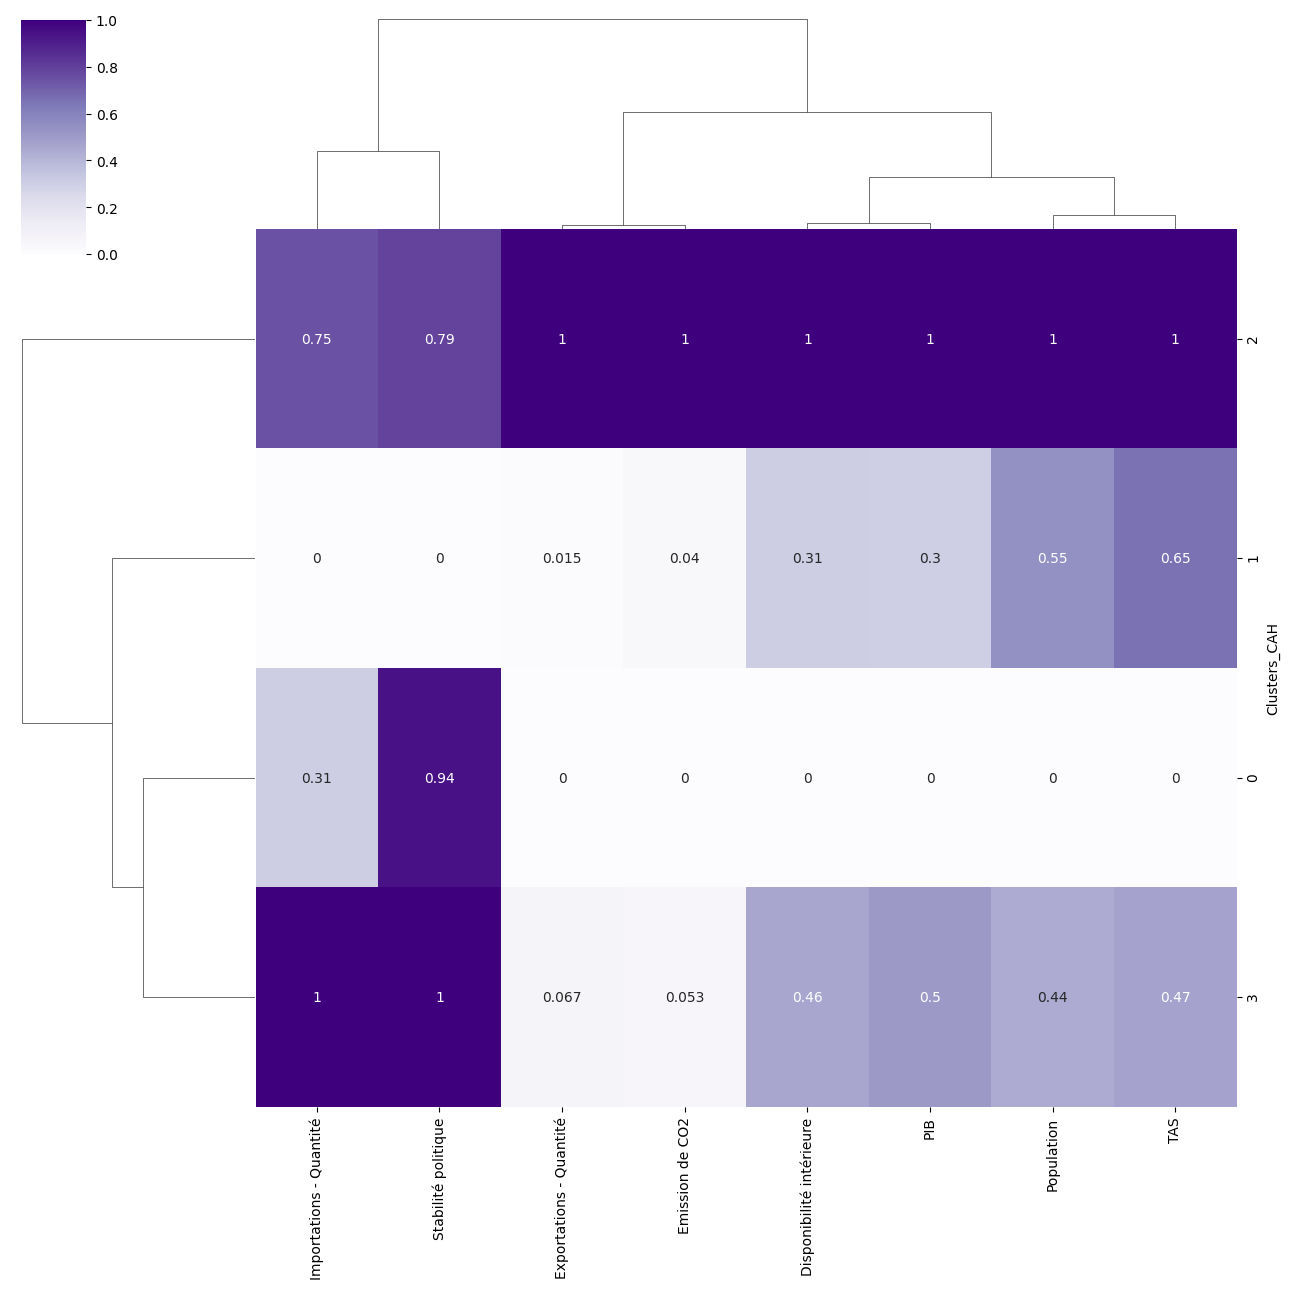

In [13]:
# Création d'un dataframe avec les centroïdes de chaque cluster
df_clusters = df.groupby(['Clusters_CAH']).mean()

# Observons la répartitions de nos clusters avec une clustermap
sns.clustermap(df_clusters, figsize=(13,13), annot=True, standard_scale=1, method='ward', cmap="Purples")

Essayons un graphique en radar par clusters pour une meilleur visualisation.

#### 3.2.2 Visualisation des 4 clusters en radar <a class="anchor" id="3_2_2"></a>

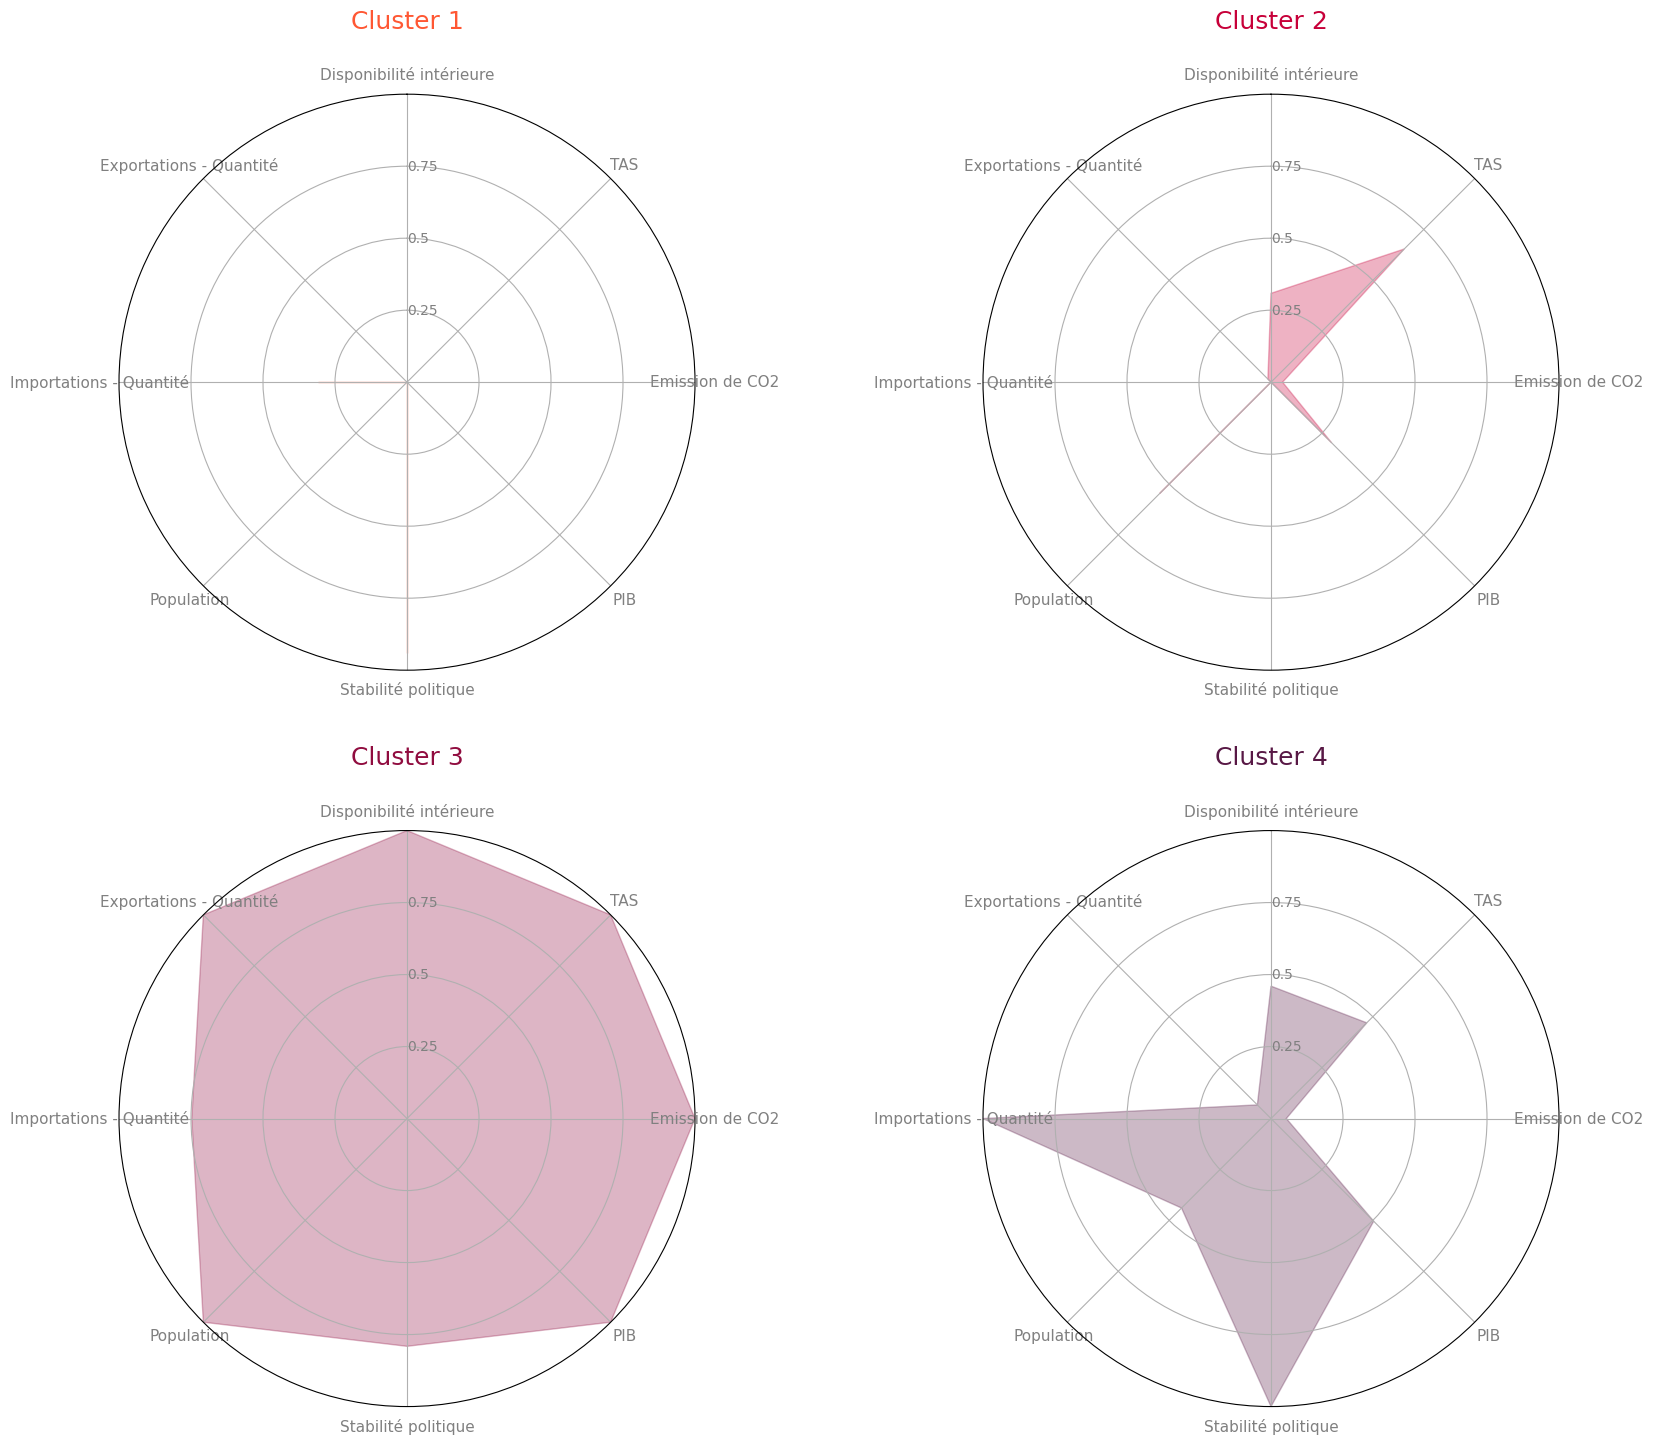

In [14]:
# Normalisation des données
df_clusters_scaled = (df_clusters - df_clusters.min()) / (df_clusters.max() - df_clusters.min())

# Palette de couleurs personnalisée pour les clusters
custom_palette = ['#FF5733', '#C70039', '#900C3F', '#581845']

# Fonction pour tracer le graphique en radar
def make_spider(row, title, color):
    # Nombre de variables
    categories = list(df_clusters.columns)
    N = len(categories)
    
    # Convertir les valeurs en une liste
    values = df_clusters_scaled.loc[title].tolist()
    values = values + values[:1]  # Fermer le graphique en radar
    
    # Calcul des angles pour chaque axe
    angles = np.linspace(0, 2 * pi, N, endpoint=False).tolist()
    angles = angles + angles[:1]  # Fermer le graphique en radar
    
    # Initialiser le graphique en radar
    ax = plt.subplot(num_rows_CAH, num_cols_CAH, row + 1, polar=True)
    ax.set_theta_offset(pi / 2)  # Définir la direction du premier axe
    
    # Tracer le graphique en radar
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    plt.yticks([0.25, 0.5, 0.75], ["0.25", "0.5", "0.75"], color="grey", size=10, va='center')
    plt.ylim(0, 1)
    
    # Remplir le graphique en radar avec les valeurs normalisées
    ax.fill(angles, values, color=color, alpha=0.3)
    
    # Ajouter le titre du cluster avec un espacement
    plt.title(f"Cluster {title+1}", size=18, color=color, y=1.1)

    # Ajuster la position des étiquettes des axes
    for tick, angle in zip(ax.get_xticklabels(), angles):
        tick.set_verticalalignment("center")
        tick.set_horizontalalignment("center")
        tick.set_rotation(angle * 180 / pi)
        
    # Ajuster la taille des étiquettes des axes
    ax.set_xticklabels(ax.get_xticklabels(), size=11)
    
    # Ajuster l'espacement des étiquettes des axes y
    ax.set_rlabel_position(0)  # Positionner les étiquettes à l'extérieur des axes
    ax.yaxis.set_label_coords(-0.15, 0.5)  # Définir les coordonnées de l'étiquette des axes y

# Calculer le nombre de clusters
num_clusters_CAH = len(df_clusters_scaled.index)

# Calculer le nombre de sous-graphiques par ligne
num_cols_CAH = 2
num_rows_CAH = (num_clusters_CAH + num_cols_CAH - 1) // num_cols_CAH

# Ajuster la taille de la figure
fig = plt.figure(figsize=(12, 15))

# Tracer les graphiques en radar pour chaque cluster
for i, cluster in enumerate(df_clusters_scaled.index):
    plt.subplot(num_rows_CAH, num_cols_CAH, i + 1, polar=True)
    make_spider(row=i, title=cluster, color=custom_palette[i])

# Ajuster les marges de la figure pour réduire l'espace entre les graphiques et les titres
plt.subplots_adjust(top=0.95, bottom=0.05, left=0, right=1.2, hspace=0.2, wspace=0.5)

# Afficher les graphiques en radar
plt.show()

In [15]:
# Nous pouvons créer des listes afin d'indentifier les individus ('pays') de nos clusters
for i in range(4):
    print(f'Cluster {i+1}')
    liste_clusters_CAH = df[df.Clusters_CAH == i].index.tolist()
    nb_pays = len(liste_clusters_CAH)
    print(f'Nombre de pays dans le cluster : {nb_pays}')
    print(liste_clusters_CAH)
    print()

Cluster 1
Nombre de pays dans le cluster : 78
['Albanie', 'Antigua-et-Barbuda', 'Arménie', 'Azerbaïdjan', 'Bahamas', 'Barbade', 'Belize', 'Bosnie-Herzégovine', 'Botswana', 'Cabo Verde', 'Cambodge', 'Chine - RAS de Macao', 'Chypre', 'Costa Rica', 'Croatie', "Côte d'Ivoire", 'Djibouti', 'Dominique', 'El Salvador', 'Estonie', 'Eswatini', 'Fidji', 'Finlande', 'Gabon', 'Gambie', 'Grenade', 'Guinée', 'Guinée-Bissau', 'Guyana', 'Géorgie', 'Haïti', 'Honduras', 'Islande', 'Jamaïque', 'Kirghizistan', 'Kiribati', 'Lesotho', 'Lettonie', 'Liban', 'Libéria', 'Lituanie', 'Luxembourg', 'Macédoine du Nord', 'Maldives', 'Malte', 'Maurice', 'Mauritanie', 'Mongolie', 'Monténégro', 'Mozambique', 'Namibie', 'Nicaragua', 'Norvège', 'Nouvelle-Calédonie', 'Nouvelle-Zélande', 'Panama', 'Polynésie française', 'République de Moldova', 'Saint-Kitts-et-Nevis', 'Saint-Vincent-et-les Grenadines', 'Sainte-Lucie', 'Samoa', 'Sao Tomé-et-Principe', 'Serbie', 'Sierra Leone', 'Slovaquie', 'Slovénie', 'Suriname', 'Tadjikist

## 4. Classification avec la méthode du K-Means <a class="anchor" id="4"></a>

### 4.1 Méthode du coude <a class="anchor" id="4_1"></a>

In [16]:
# Il faut créer une liste où on va stocker toutes les distances pour les différentes valeurs de k (nous utiliserons nos données centrées réduites)
somme_distances = []

for i in range(1,7):
    kmeans = KMeans(n_clusters = i, random_state=0)
    kmeans.fit_predict(X_scaled)
    somme_distances.append(kmeans.inertia_)

somme_distances

[1368.0,
 1002.2979197215195,
 795.9352661235644,
 633.4200616804421,
 555.0557617477913,
 492.34604059175734]

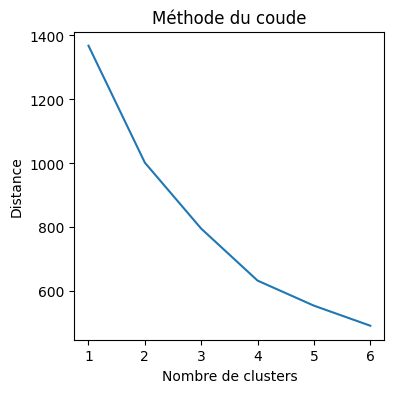

In [17]:
# Utilisons Matplotlib pour représenter ces distances en fonctions du nombre de clusters
# La méthode du coude nous permettra de pouvoir visualiser le nombre optimal de clusters

plt.figure(figsize=(4,4))
plt.plot(range (1,7), somme_distances)
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Distance')
plt.show()

Le premier coude est réalisé pour 2 clusters et le deuxième semble réalisé à 4 clusters. 

Nous choisirons donc 4 clusters pour la méthode du KMeans.

### 4.2 Calcul des 4 clusters <a class="anchor" id="4_2"></a>

In [18]:
# Initions notre modèle pour 4 clusters
model = KMeans(n_clusters=4, random_state=0)

# Entrainons notre modèle 
clusters_kmeans = model.fit_predict(X_scaled)

In [19]:
# Rajoutons la colonne avec les clusters KMeans
df['Clusters_KMeans'] = clusters_kmeans

### 4.3 Visualisation dans le repère des composantes principales 1 et 2 <a class="anchor" id="4_3"></a>

In [20]:
# Créer une variable pour nos centroïdes
centroids = model.cluster_centers_

In [21]:
# Appliquer l'acp pour avoir 3 composantes
pca = PCA(n_components=3).fit(X_scaled)
Xk_projected = pca.transform(X_scaled)

# puis sur les centroïdes
centroids = pca.transform(centroids)

In [22]:
# Créer un DataFrame avec les données centrées réduites
df_scaled = pd.DataFrame(Xk_projected, index=pays)

# Rajoutons les clusters
df_scaled['Clusters_KMeans'] = clusters_kmeans

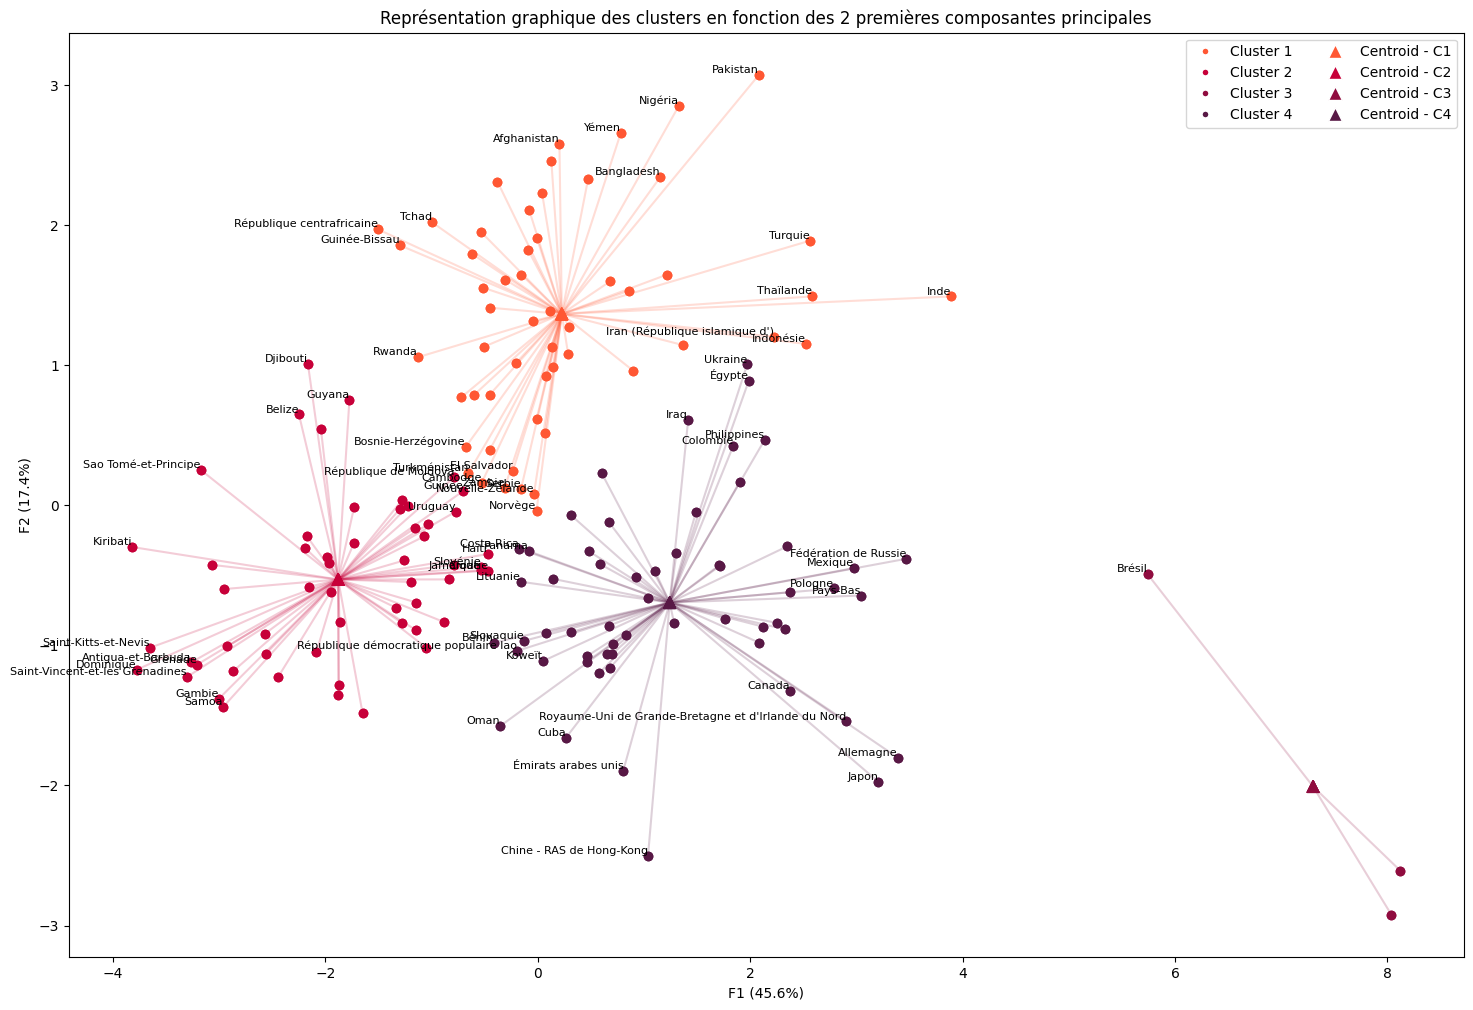

In [23]:
# Observons nos données en fonction des composantes principales calculées précédemment
colors = ['#FF5733', '#C70039', '#900C3F', '#581845']
plt.figure(figsize=(18, 12))

for i in range(4):
    cluster_points = df_scaled[clusters_kmeans == i]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], c=colors[i], alpha=1)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c=colors, s=70)

threshold = 1.2  # Seuil de distance pour afficher le nom du pays

for i in range(4):
    cluster_points = df_scaled[clusters_kmeans == i]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], c=colors[i], alpha=1)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c=colors, s=70)

    for idx, val in cluster_points.iterrows():
        x = [val[0], centroids[i, 0]]
        y = [val[1], centroids[i, 1]]
        plt.plot(x, y, c=colors[i], alpha=0.2)

        distance = np.sqrt((val[0] - centroids[i, 0]) ** 2 + (val[1] - centroids[i, 1]) ** 2)
        if distance > threshold:
            plt.text(val[0], val[1], idx, fontsize=8, verticalalignment='bottom', horizontalalignment='right')

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
                   markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
legend_elements.extend([Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)])

plt.legend(handles=legend_elements, loc='upper right', ncol=2)

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))

plt.title('Représentation graphique des clusters en fonction des 2 premières composantes principales')
plt.show()

### 4.4 Visualisation dans le repère des composantes principales 1, 2 et 3 <a class="anchor" id="4_4"></a>

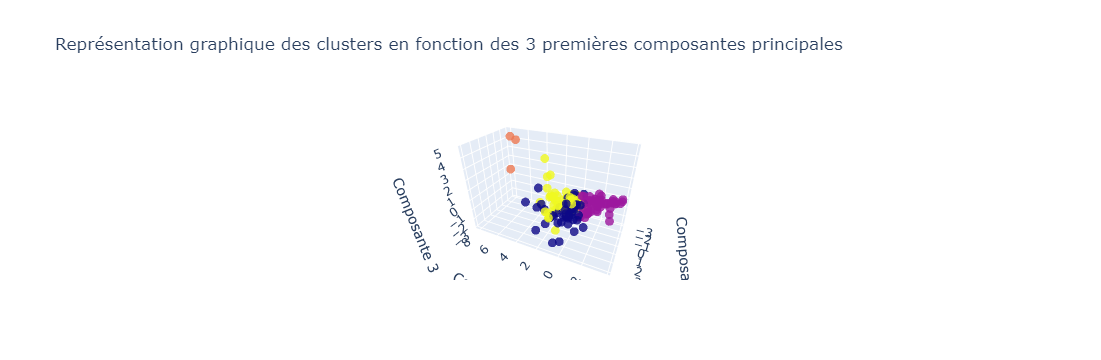

In [24]:
# Observons nos données en fonction des composantes principales calculées précédemment mais cette fois-ci sur 3 composantes
trace = go.Scatter3d(
                    x = df_scaled.iloc[:, 0],
                    y = df_scaled.iloc[:, 1],
                    z = df_scaled.iloc[:, 2],
                    mode = 'markers',
                    marker = dict(color=df_scaled['Clusters_KMeans'], size = 5), 
                    line=dict(color=df_scaled['Clusters_KMeans'], width=16),
                    opacity=0.8
                    )

data = [trace]
layout = go.Layout(
                    title='Représentation graphique des clusters en fonction des 3 premières composantes principales',
                    scene= dict(
                                xaxis = dict(title='Composante 1'),
                                yaxis = dict(title='Composante 2'),
                                zaxis = dict(title='Composante 3'))
                                )

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
plt.show()

### 4.5 Clustermap des 4 clusters <a class="anchor" id="4_5"></a>

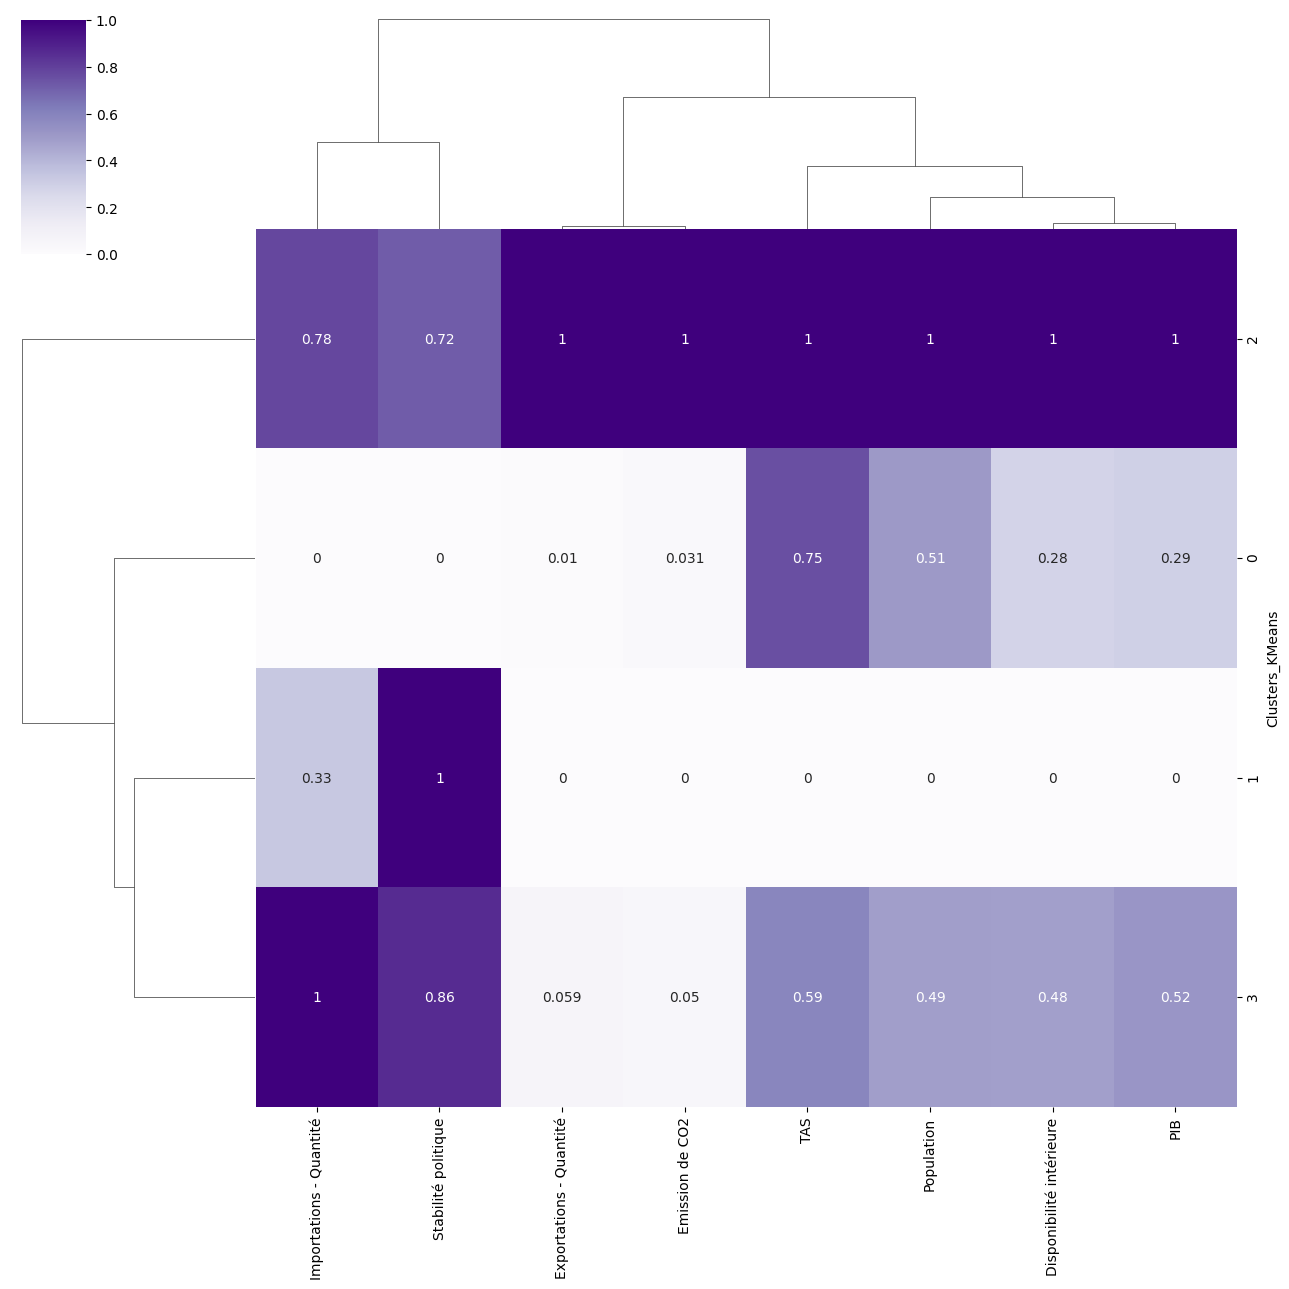

In [25]:
# Création d'un dataframe avec les centroïdes de chaque cluster
df_clusters2 = df.groupby(['Clusters_KMeans']).mean()
df_clusters2.drop(columns='Clusters_CAH', inplace=True) 

# Observons la répartitions de nos clusters avec une clustermap
sns.clustermap(df_clusters2, figsize=(13,13), annot=True, standard_scale=1, method='ward', cmap="Purples")

### 4.6 Visualisation 'radar' des 4 clusters <a class="anchor" id="4_6"></a>

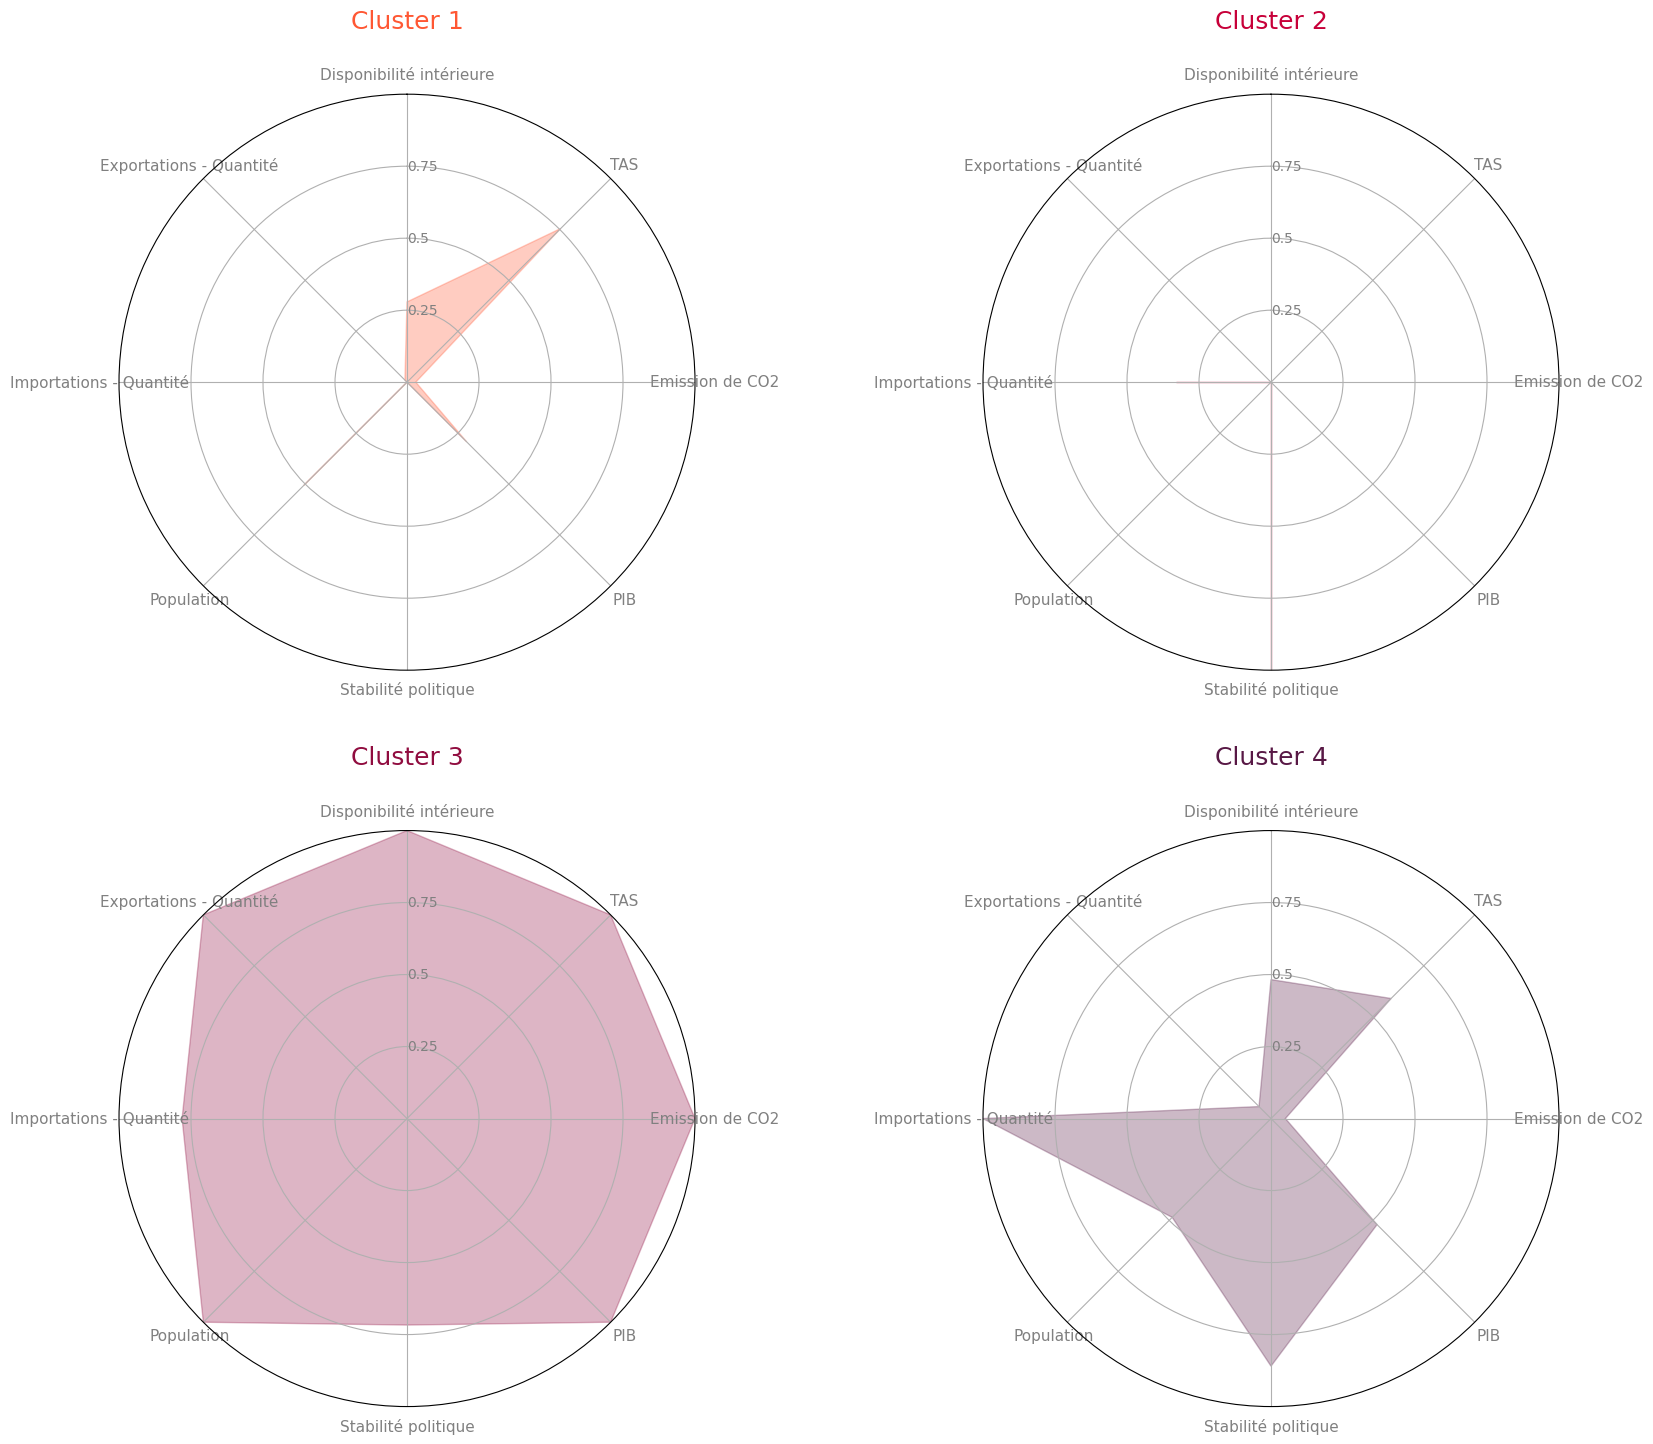

In [26]:
# Normalisation des données
df_clusters2_scaled = (df_clusters2 - df_clusters2.min()) / (df_clusters2.max() - df_clusters2.min())

# Palette de couleurs personnalisée pour les clusters
custom_palette = ['#FF5733', '#C70039', '#900C3F', '#581845']

# Fonction pour tracer le graphique en radar
def make_spider(row, title, color):
    # Nombre de variables
    categories = list(df_clusters2.columns)
    N = len(categories)
    
    # Convertir les valeurs en une liste
    values = df_clusters2_scaled.loc[title].tolist()
    values = values + values[:1]  # Fermer le graphique en radar
    
    # Calcul des angles pour chaque axe
    angles = np.linspace(0, 2 * pi, N, endpoint=False).tolist()
    angles = angles + angles[:1]  # Fermer le graphique en radar
    
    # Initialiser le graphique en radar
    ax = plt.subplot(num_rows_CAH, num_cols_CAH, row + 1, polar=True)
    ax.set_theta_offset(pi / 2)  # Définir la direction du premier axe
    
    # Tracer le graphique en radar
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    plt.yticks([0.25, 0.5, 0.75], ["0.25", "0.5", "0.75"], color="grey", size=10, va='center')
    plt.ylim(0, 1)
    
    # Remplir le graphique en radar avec les valeurs normalisées
    ax.fill(angles, values, color=color, alpha=0.3)
    
    # Ajouter le titre du cluster avec un espacement
    plt.title(f"Cluster {title+1}", size=18, color=color, y=1.1)

    # Ajuster la position des étiquettes des axes
    for tick, angle in zip(ax.get_xticklabels(), angles):
        tick.set_verticalalignment("center")
        tick.set_horizontalalignment("center")
        tick.set_rotation(angle * 180 / pi)
        
    # Ajuster la taille des étiquettes des axes
    ax.set_xticklabels(ax.get_xticklabels(), size=11)
    
    # Ajuster l'espacement des étiquettes des axes y
    ax.set_rlabel_position(0)  # Positionner les étiquettes à l'extérieur des axes
    ax.yaxis.set_label_coords(-0.15, 0.5)  # Définir les coordonnées de l'étiquette des axes y

# Calculer le nombre de clusters
num_clusters = len(df_clusters2_scaled.index)

# Calculer le nombre de sous-graphiques par ligne
num_cols = 2
num_rows = (num_clusters + num_cols - 1) // num_cols 

# Ajuster la taille de la figure
fig = plt.figure(figsize=(12, 15))

# Tracer les graphiques en radar pour chaque cluster
for i, cluster in enumerate(df_clusters2_scaled.index):
    plt.subplot(num_rows, num_cols, i + 1, polar=True)
    make_spider(row=i, title=cluster, color=custom_palette[i])

# Ajuster les marges de la figure pour réduire l'espace entre les graphiques et les titres
plt.subplots_adjust(top=0.95, bottom=0.05, left=0, right=1.2, hspace=0.2, wspace=0.5)

# Afficher les graphiques en radar
plt.show()

In [27]:
# Nous pouvons créer des listes afin d'indentifier les individus ('pays') de nos clusters
for i in range(4):
    print(f'Cluster {i+1}')
    liste_clusters_KMeans = df[df.Clusters_KMeans == i].index.tolist()
    nb_pays = len(liste_clusters_KMeans)
    print(f'Nombre de pays dans le cluster : {nb_pays}')
    print(liste_clusters_KMeans)
    print()

Cluster 1
Nombre de pays dans le cluster : 55
['Afghanistan', 'Algérie', 'Azerbaïdjan', 'Bangladesh', 'Bolivie (État plurinational de)', 'Bosnie-Herzégovine', 'Burkina Faso', 'Cambodge', 'Cameroun', 'Congo', "Côte d'Ivoire", 'El Salvador', 'Guinée-Bissau', 'Honduras', 'Inde', 'Indonésie', "Iran (République islamique d')", 'Israël', 'Kenya', 'Liban', 'Madagascar', 'Malawi', 'Mali', 'Maroc', 'Mozambique', 'Myanmar', 'Nicaragua', 'Niger', 'Nigéria', 'Norvège', 'Nouvelle-Zélande', 'Népal', 'Ouganda', 'Pakistan', 'Paraguay', 'Rwanda', 'République centrafricaine', 'République populaire démocratique de Corée', 'République-Unie de Tanzanie', 'Serbie', 'Soudan', 'Sri Lanka', 'Sénégal', 'Tchad', 'Thaïlande', 'Togo', 'Tunisie', 'Turkménistan', 'Turquie', 'Venezuela (République bolivarienne du)', 'Yémen', 'Zambie', 'Zimbabwe', 'Équateur', 'Éthiopie']

Cluster 2
Nombre de pays dans le cluster : 56
['Albanie', 'Antigua-et-Barbuda', 'Arménie', 'Bahamas', 'Barbade', 'Belize', 'Botswana', 'Cabo Verde',

## 5. Analyse des clusters retenus <a class="anchor" id="5"></a>

### 5.1 Similitude entre les deux clusters <a class="anchor" id="5_1"></a>

In [28]:
# Création d'une liste avec les pays du cluster 4 de la méthode par CAH
pays_cluster_CAH = df[df['Clusters_CAH'] == 3].index.tolist()

# Création d'une liste avec les pays du cluster 3 de la méthode K-Means
pays_cluster_KMeans = df[df['Clusters_KMeans'] == 2].index.tolist()

# Création d'une liste avec les pays présents dans les deux listes
pays_present_dans_les_deux = list(set(pays_cluster_CAH) & set(pays_cluster_KMeans))

# Création d'une liste avec les pays seulement présents dans pays_cluster_CAH
pays_seulement_dans_CAH = list(set(pays_cluster_CAH) - set(pays_cluster_KMeans))

# Création d'une liste avec les pays seulement présents dans pays_cluster_KMeans
pays_seulement_dans_KMeans = list(set(pays_cluster_KMeans) - set(pays_cluster_CAH))

# Calcul du pourcentage de similitude
pourcentage_similitude = (len(pays_present_dans_les_deux) / max(len(pays_cluster_CAH),len(pays_cluster_KMeans))) * 100

# Affichage des résultats
print("Pourcentage de similitude :", round(pourcentage_similitude,2),"%")
print()
print("Pays présents dans les deux listes :", pays_present_dans_les_deux)
print()
print("Pays seulement présents dans pays_cluster_CAH :", pays_seulement_dans_CAH)
print()
print("Pays seulement présents dans pays_cluster_KMeans :", pays_seulement_dans_KMeans)

Pourcentage de similitude : 0.0 %

Pays présents dans les deux listes : []

Pays seulement présents dans pays_cluster_CAH : ['Chine, Taiwan Province de', 'Irlande', 'Afrique du Sud', 'Bulgarie', 'Guatemala', 'Australie', 'Danemark', 'Hongrie', 'Arabie saoudite', 'Tchéquie', 'Chili', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Grèce', 'Suède', 'Pays-Bas', 'Roumanie', 'République dominicaine', 'Cuba', 'Argentine', 'Fédération de Russie', 'Chine - RAS de Hong-Kong', 'Belgique', 'Ghana', 'Koweït', 'Canada', 'Oman', 'Suisse', 'Jordanie', 'République de Corée', 'Italie', 'Portugal', 'Angola', 'Malaisie', 'Espagne', 'Viet Nam', 'Kazakhstan', 'Ouzbékistan', 'République démocratique populaire lao', 'Pologne', 'Pérou', 'Autriche', 'Émirats arabes unis', 'Allemagne', 'Mexique', 'Japon', 'Bénin', 'Bélarus']

Pays seulement présents dans pays_cluster_KMeans : ['Chine, continentale', 'Brésil', "États-Unis d'Amérique"]


### 5.2 Choix du cluster <a class="anchor" id="5_2"></a>

In [29]:
# Création de deux dataframes avec les centroïdes des clusters sélectionnées pour les deux méthode
df_clusters_CAH = df[df['Clusters_CAH'].isin([3])].groupby('Clusters_CAH').mean()
df_clusters_CAH.drop(columns='Clusters_KMeans', inplace=True)

df_clusters_KMeans = df[df['Clusters_KMeans'].isin([2])].groupby('Clusters_KMeans').mean()
df_clusters_KMeans.drop(columns='Clusters_CAH', inplace=True)

# Ajouter une colonne pour nommer les clusters pour df_clusters_CAH
df_clusters_CAH['Clusters'] = 'Cluster CAH ' + df_clusters_CAH.index.astype(str)
df_clusters_CAH = df_clusters_CAH.reset_index(drop=True)

# Ajouter une colonne pour nommer les clusters pour df_clusters_KMeans
df_clusters_KMeans['Clusters'] = 'Cluster K-Means ' + df_clusters_KMeans.index.astype(str)
df_clusters_KMeans = df_clusters_KMeans.reset_index(drop=True)

# Concatener les 2 dataframes
Clusters = pd.concat([df_clusters_CAH, df_clusters_KMeans], axis=0).reset_index(drop=True)

# Utiliser la colonne 'Clusters' en index
Clusters = Clusters.set_index('Clusters')
Clusters

Disponibilité intérieure  Exportations - Quantité  \
Clusters                                                               
Cluster CAH 3                      6.237044                 8.381950   
Cluster K-Means 2                  9.609526                 8.831541   

                   Importations - Quantité  Population  Stabilité politique  \
Clusters                                                                      
Cluster CAH 3                     5.024464   16.808638             4.006926   
Cluster K-Means 2                 4.107489   19.942163             3.719839   

                         PIB  Emission de CO2       TAS  
Clusters                                                 
Cluster CAH 3      12.564928        16.236063  6.138961  
Cluster K-Means 2  15.883549        16.604666  6.216464

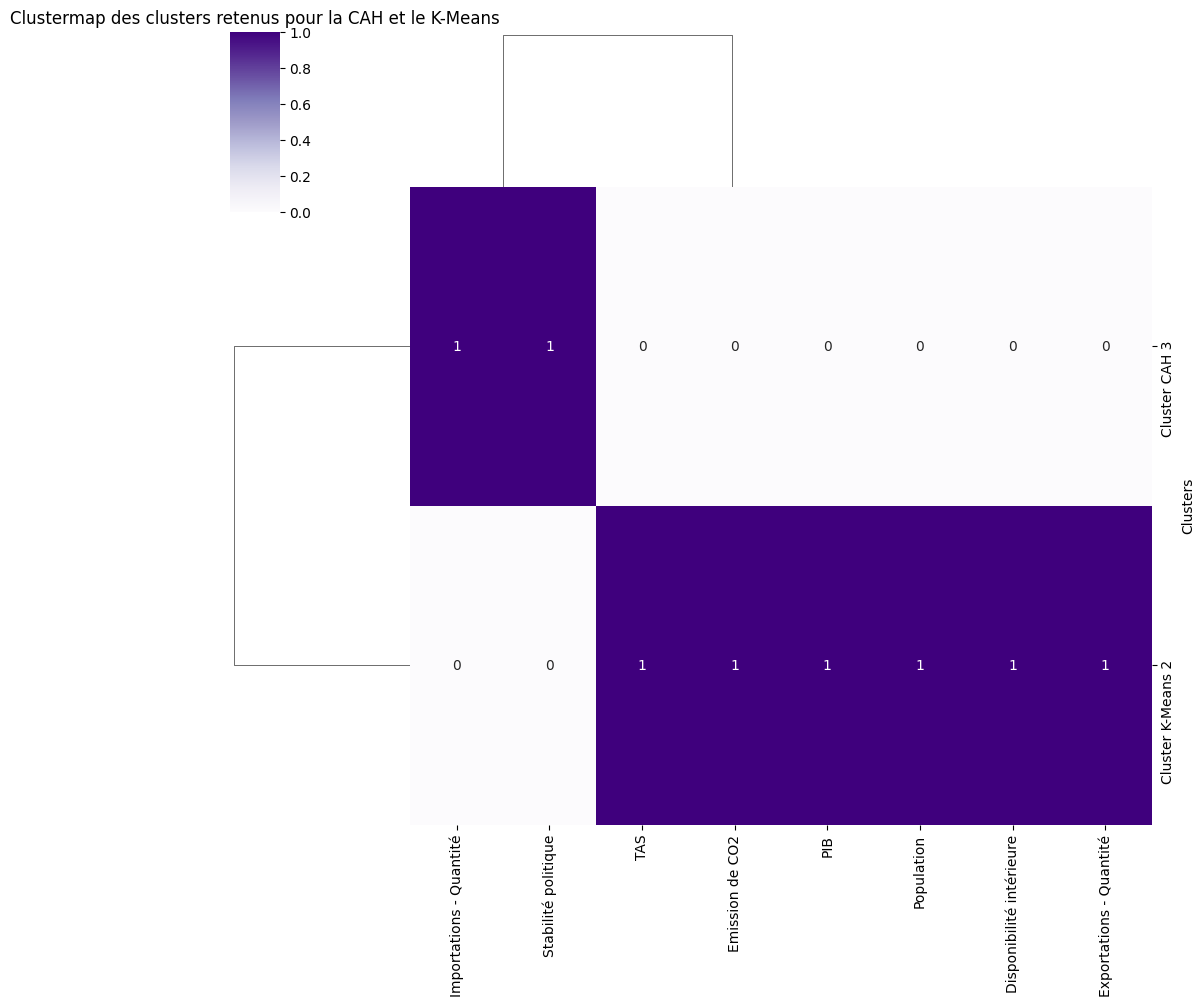

In [30]:
# Observons la répartitions de nos clusters avec une clustermap
sns.clustermap(Clusters, figsize=(10,10), annot=True, standard_scale=1, method='ward', cmap="Purples")
plt.title('Clustermap des clusters retenus pour la CAH et le K-Means')
plt.show()

Cette clustermap nous permet de choisir le cluster présentant les scores les plus élevés. Dans ce cas, le cluster obtenu par la méthode de CAH semble être le meilleur choix. Bien qu'il contienne moins de pays, la liste des 47 pays semble correspondre.

Cependant, il est important de noter que la sélection des pays à partir de cette liste reste subjective, car elle dépend des objectifs de vente spécifiques. Par exemple, si l'objectif est de réduire les émission de CO2 en exportant vers des pays plus proches ou de favoriser la stabilité politique des pays clients, cela nécessitera un tri supplémentaire de la liste.

Cependant, ces 47 pays sont considérés comme intéressants pour le marché de la viande de volaille, car nous cherchons à obtenir les meilleurs scores en termes de PIB, de stabilité politique et d'importation en quantité de viande de volaille.